In [21]:
#-*- coding : utf-8 -*-
# coding: utf-8
import seaborn as sns
import pandas as pd
from patsy import dmatrices
import numpy as np
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['axes.unicode_minus'] = False
df = pd.DataFrame(pd.read_csv('iris_training.csv', encoding='gbk'))

In [22]:
y=df.groupby('花种类').get_group(2)['花瓣宽度']
x=df.groupby('花种类').get_group(2)['花瓣长度']
X=sm.add_constant(x)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   花瓣宽度   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     4.639
Date:                Wed, 21 Jul 2021   Prob (F-statistic):             0.0373
Time:                        18:42:59   Log-Likelihood:                -2.3990
No. Observations:                  42   AIC:                             8.798
Df Residuals:                      40   BIC:                             12.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1850      0.397      2.984      0.0

In [23]:
print(results.params)

const    1.184962
花瓣长度     0.152569
dtype: float64


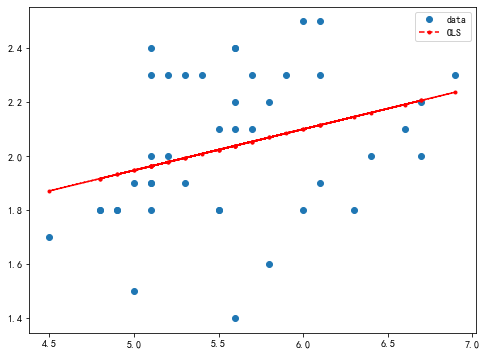

In [24]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')

